In [1]:


import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.cluster import KMeans

from scipy.sparse import hstack

import matplotlib.pyplot as plt

 



In [ ]:
# --------------------------------------------

# Step 1: Load and filter dataset

# --------------------------------------------

import pandas as pd


df = pd.read_csv("/Users/Denis/Desktop/reasssignment 5.csv", encoding='latin-1')


 


In [10]:
df.head(10)  

,number,u_kyndryl_correlation_id,opened_at,short_description,caller_id,u_affected_user,u_affected_user.active,priority,state,category,assignment_group,assigned_to,sys_updated_on,sys_updated_by,cmdb_ci.location,u_opened_by_group
0,INC0426956,NaN,01/Aug/2024 10:28:13,DHA00844AP01:PRTG could not find a table row m...,netcooluser,netcooluser,True,3 - Medium,Closed,Network,A-GRY-APAC-BD,Shushanto Banik,30/Aug/2024 13:00:39,Priyadharshani.R@wpp.com,APAC-BD-DHAKA-0030,NaN
1,INC0414842,NaN,29/Jul/2024 10:13:44,Laptop not working,Urfi Ahmad,Urfi Ahmad,True,3 - Medium,Closed,Hardware,A-GRY-APAC-BD,NaN,30/Aug/2024 10:50:31,Priyadharshani.R@wpp.com,NaN,NaN
2,INC1011275,NaN,14/Mar/2025 03:07:22,DHA00844SW01:Error caused by lookup value Shut...,netcooluser,netcooluser,True,3 - Medium,Closed,Environment,A-GRY-APAC-BD,NaN,22/Mar/2025 06:00:02,system,APAC-BD-DHAKA-0030,NaN
3,INC0337902,NaN,03/Jul/2024 08:11:59,Need to unblock Microsoft Store for applicatio...,Ucho Aung,Nazia Ahmed,True,3 - Medium,Closed,Application,A-GRY-APAC-BD,NaN,22/Jul/2024 06:00:21,system,NaN,NaN
4,INC0357319,NaN,10/Jul/2024 07:11:45,Application - Sophos Safeguard and Okta issue,Fadi Chehade,Samaya Elhariri,False,3 - Medium,Closed,Application,A-GRY-EMEA-Doha IT Support,Mohammad Obeidat,24/Jul/2024 06:00:06,system,NaN,NaN
5,INC0104922,INC15686877,29/Apr/2024 09:07:37,Sophos AV has detected a Malware Alert on the ...,Elangovan Kuttiannan,Guest,True,3 - Medium,Closed,Application,A-GRY-EMEA-Dubai IT Support,Mohammad Obeidat,27/Jun/2024 09:54:09,Priyadharshani.R@wpp.com,NaN,NaN
6,INC0249979,NaN,04/Jun/2024 18:49:21,Password Sync issue #Kanji migration,Vee Motingoa,Vee Motingoa,False,4 - Low,Closed,Account,A-GRY-EMEA-South Africa IT Support,NaN,12/Aug/2024 06:52:18,vee.motingoa@grey.com,NaN,NaN
7,INC0204779,NaN,23/May/2024 07:32:37,Laptop charger fraying,Ditshego Madopi,Ditshego Madopi,False,3 - Medium,Closed,Hardware,A-GRY-EMEA-South Africa IT Support,NaN,13/Aug/2024 12:00:17,system,NaN,NaN
8,INC0186104,NaN,17/May/2024 14:34:29,Low disk space issue,Lesego Maphutha,Lesego Maphutha,False,3 - Medium,Closed,OS/Platform,A-GRY-EMEA-South Africa IT Support,NaN,13/Aug/2024 12:00:09,system,NaN,NaN
9,INC0541510,NaN,11/Sep/2024 13:02:14,Unable to login to email,Tomas Krizan,Motsi Macheka,True,4 - Low,Closed,Messaging and Collaboration,A-GRY-EMEA-South Africa IT Support,Lebogang Maila,14/Nov/2024 19:00:21,system,NaN,NaN


In [11]:



 

# --------------------------------------------

# Step 2: Clean and preprocess columns

# --------------------------------------------

# Fill missing values

df['short_description'] = df['short_description'].fillna('')

df['priority'] = df['priority'].fillna('3')  # Assuming 3 = Medium

df['category'] = df['category'].fillna('Unknown')

df['assignment_group'] = df['assignment_group'].fillna('Unknown')

 



In [12]:
# --------------------------------------------

# Step 3: Text vectorization (TF-IDF)

# --------------------------------------------

vectorizer = TfidfVectorizer(stop_words='english', max_df=0.9, min_df=2)

X_text = vectorizer.fit_transform(df['short_description'])

 

# --------------------------------------------



In [13]:
# Step 4: Encode categorical variables

# --------------------------------------------

le_priority = LabelEncoder()

le_category = LabelEncoder()

le_group = LabelEncoder()

 

priority_encoded = le_priority.fit_transform(df['priority'])

category_encoded = le_category.fit_transform(df['category'])

group_encoded = le_group.fit_transform(df['assignment_group'])

 

# Combine into DataFrame

X_meta = pd.DataFrame({

    'priority': priority_encoded,

    'category': category_encoded,

    'assignment_group': group_encoded

})

 



In [15]:
# --------------------------------------------

# Step 5: Scale metadata features

# --------------------------------------------

scaler = StandardScaler()

X_meta_scaled = scaler.fit_transform(X_meta)

 

# --------------------------------------------


In [16]:
# --------------------------------------------

# Step 6: Combine text and metadata features

# --------------------------------------------

X_combined = hstack([X_text, X_meta_scaled])

 



In [18]:
X_combined

<18195x4905 sparse matrix of type '<class 'numpy.float64'>'
	with 149200 stored elements in COOrdinate format>

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


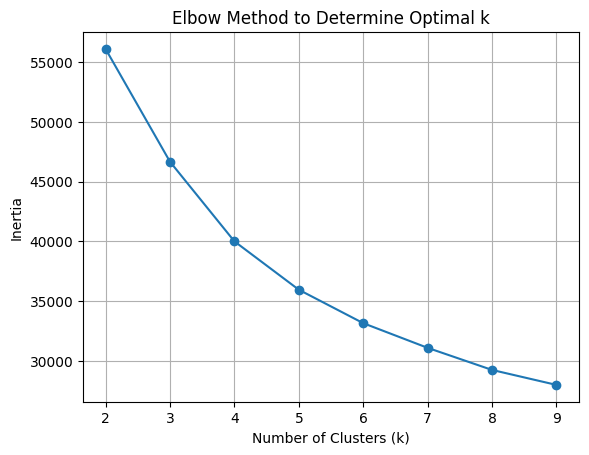

In [19]:



# Step 7: Find optimal k using Elbow Method

# --------------------------------------------

inertia = []

K = range(2, 10)

for k in K:

    kmeans = KMeans(n_clusters=k, random_state=42)

    kmeans.fit(X_combined)

    inertia.append(kmeans.inertia_)

 

# Plot elbow curve

plt.plot(K, inertia, marker='o')

plt.xlabel("Number of Clusters (k)")

plt.ylabel("Inertia")

plt.title("Elbow Method to Determine Optimal k")

plt.grid(True)

plt.show()

 


# df.to_csv("clustered_tickets.csv", index=False

In [20]:
# Step 8: Fit final KMeans model

# --------------------------------------------

optimal_k = 4  # Change based on elbow plot

kmeans = KMeans(n_clusters=optimal_k, random_state=42)

df['cluster'] = kmeans.fit_predict(X_combined)

 



In [21]:
# Step 9: Show clustered results

# --------------------------------------------

print(df[['short_description', 'priority', 'category', 'assignment_group', 'cluster']].head(15))

 

# Optional: Save clustered results to file

# df.to_csv("clustered_tickets.csv", index=False

                                    short_description    priority  \
0   DHA00844AP01:PRTG could not find a table row m...  3 - Medium   
1                                  Laptop not working  3 - Medium   
2   DHA00844SW01:Error caused by lookup value Shut...  3 - Medium   
3   Need to unblock Microsoft Store for applicatio...  3 - Medium   
4       Application - Sophos Safeguard and Okta issue  3 - Medium   
5   Sophos AV has detected a Malware Alert on the ...  3 - Medium   
6                Password Sync issue #Kanji migration     4 - Low   
7                              Laptop charger fraying  3 - Medium   
8                                Low disk space issue  3 - Medium   
9                            Unable to login to email     4 - Low   
10  Users accounts created on Persona are not repl...  3 - Medium   
11  Production System's automated reports are gett...     4 - Low   
12  #AV issue : Delete the infected file in user m...  3 - Medium   
13                              Un

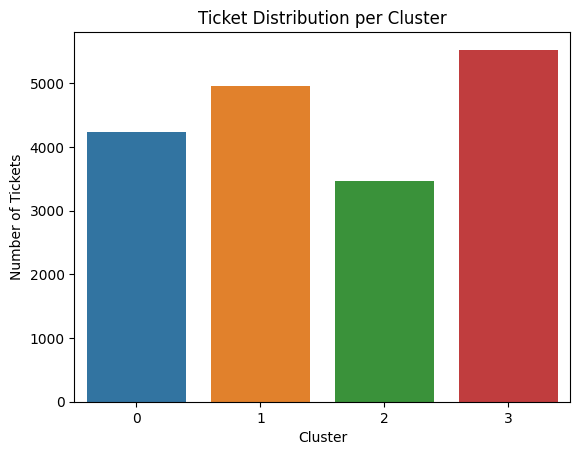

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of tickets in each cluster
cluster_counts = df['cluster'].value_counts().sort_index()

# Plot using seaborn
sns.barplot(x=cluster_counts.index, y=cluster_counts.values)
plt.xlabel("Cluster")
plt.ylabel("Number of Tickets")
plt.title("Ticket Distribution per Cluster")
plt.show()


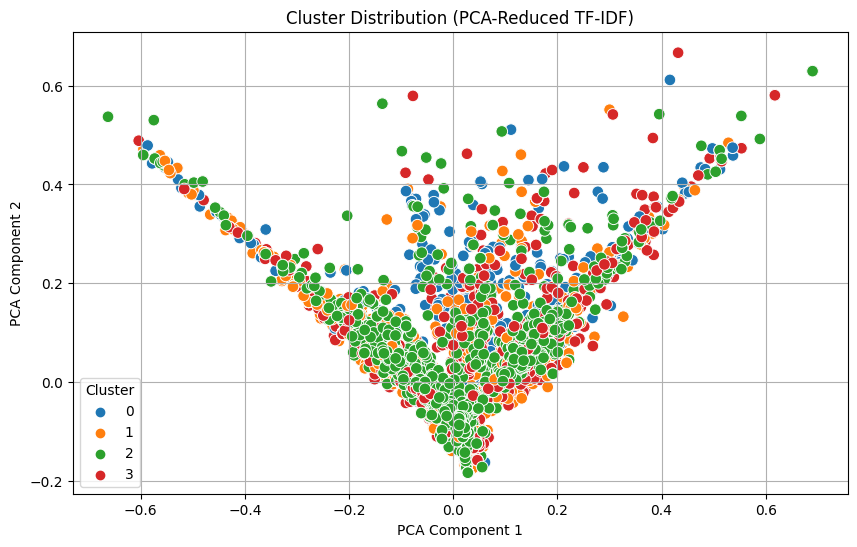

In [29]:

from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_text.toarray())  # Convert sparse matrix to dense for PCA

# 5. Add PCA results to DataFrame
df['pca_1'] = X_pca[:, 0]
df['pca_2'] = X_pca[:, 1]

# 6. Scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='pca_1', y='pca_2', hue='cluster', palette='tab10', s=70)

plt.title("Cluster Distribution (PCA-Reduced TF-IDF)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()


In [23]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from collections import Counter
import matplotlib.pyplot as plt

In [25]:
tfidf = TfidfVectorizer(max_features=300, stop_words='english')
X_text = tfidf.fit_transform(df['description_clean'])

KeyError: 'description_clean'

In [28]:
def get_top_keywords(model, feature_names, n_terms=10):
    keywords = {}
    for i, center in enumerate(model.cluster_centers_):
        top_indices = center.argsort()[::-1][:n_terms]
        top_terms = [feature_names[i] for i in top_indices]
        keywords[i] = top_terms
    return keywords

feature_names = tfidf.get_feature_names_out()
top_keywords = get_top_keywords(kmeans, feature_names)

# 5. Analyze patterns per cluster
for cluster in range(optimal_k):
    print(f"\n📌 Cluster {cluster}")
    sub_df = df[df['cluster'] == cluster]

    print("Top keywords:", top_keywords[cluster])
    print("Most common categories:", sub_df['category'].value_counts().head(3).to_dict())
    print("Most common assignment groups:", sub_df['assignment_group'].value_counts().head(3).to_dict())

    # Optional: Volume by day of week
    sub_df['weekday'] = pd.to_datetime(sub_df['opened_date']).dt.day_name()
    weekday_counts = sub_df['weekday'].value_counts()
    print("Ticket volume by weekday:", weekday_counts.to_dict())

    # Plot volume (optional)
    weekday_counts = weekday_counts.reindex([
        'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
    ])
    weekday_counts.plot(kind='bar', title=f"Cluster {cluster} - Tickets by Weekday")
    plt.show()


NotFittedError: Vocabulary not fitted or provided

In [30]:
pip install umap-learn



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


/opt/homebrew/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


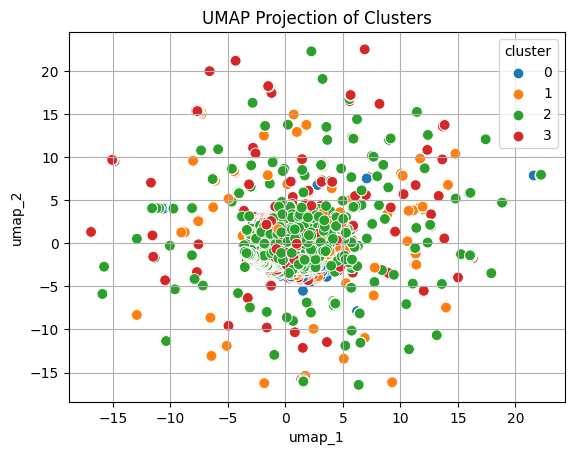

In [31]:
from umap import UMAP

umap = UMAP(n_components=2, random_state=42)
X_umap = umap.fit_transform(X_text)

df['umap_1'] = X_umap[:, 0]
df['umap_2'] = X_umap[:, 1]

sns.scatterplot(data=df, x='umap_1', y='umap_2', hue='cluster', palette='tab10', s=60)
plt.title("UMAP Projection of Clusters")
plt.grid(True)
plt.show()
